PCA Components: 1
MSE: 0.30593354751925345
------------------------------
PCA Components: 2
MSE: 0.34440256927667623
------------------------------
PCA Components: 3
MSE: 0.4537224408607258
------------------------------
PCA Components: 4
MSE: 0.5617412771658393
------------------------------
PCA Components: 5
MSE: 0.5290295001065226
------------------------------
PCA Components: 6
MSE: 0.6085060952539467
------------------------------
PCA Components: 7
MSE: 0.6449158741318933
------------------------------
PCA Components: 8
MSE: 0.5711776988055783
------------------------------
PCA Components: 9
MSE: 0.5802033786314776
------------------------------
PCA Components: 10
MSE: 0.6477167663381349
------------------------------
PCA Components: 11
MSE: 0.6539359804002645
------------------------------


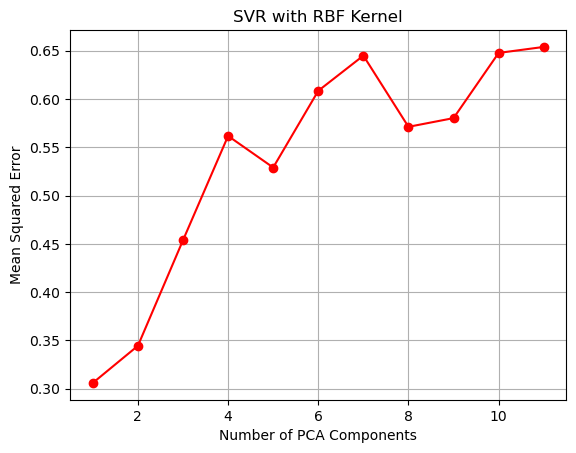

PCA Components: 1
MSE: 0.2869387597407186
------------------------------
PCA Components: 2
MSE: 0.27412671705321634
------------------------------
PCA Components: 3
MSE: 0.26699525096383986
------------------------------
PCA Components: 4
MSE: 0.26919213409802434
------------------------------
PCA Components: 5
MSE: 0.2763005256825328
------------------------------
PCA Components: 6
MSE: 0.2744158947916938
------------------------------
PCA Components: 7
MSE: 0.2802761026495783
------------------------------
PCA Components: 8
MSE: 0.28283720352766845
------------------------------
PCA Components: 9
MSE: 0.2738988045780365
------------------------------
PCA Components: 10
MSE: 0.2757793482770977
------------------------------
PCA Components: 11
MSE: 0.2594098706647533
------------------------------


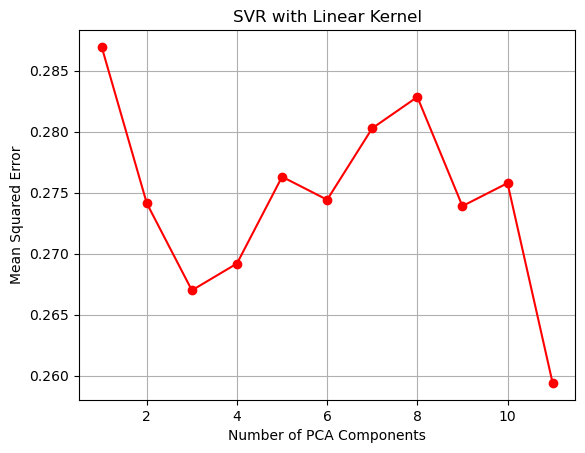

PCA Components: 1
MSE: 0.6375846284820674
------------------------------
PCA Components: 2
MSE: 1.1730761024067484
------------------------------
PCA Components: 3
MSE: 0.8703087491305173
------------------------------
PCA Components: 4
MSE: 0.5142474053854265
------------------------------
PCA Components: 5
MSE: 0.9045218753046137
------------------------------
PCA Components: 6
MSE: 0.5443605603235152
------------------------------
PCA Components: 7
MSE: 2.507202606500938
------------------------------
PCA Components: 8
MSE: 3.203945602906603
------------------------------
PCA Components: 9
MSE: 10.590458761283747
------------------------------
PCA Components: 10
MSE: 7.517843894160525
------------------------------
PCA Components: 11
MSE: 2.050555374321988
------------------------------


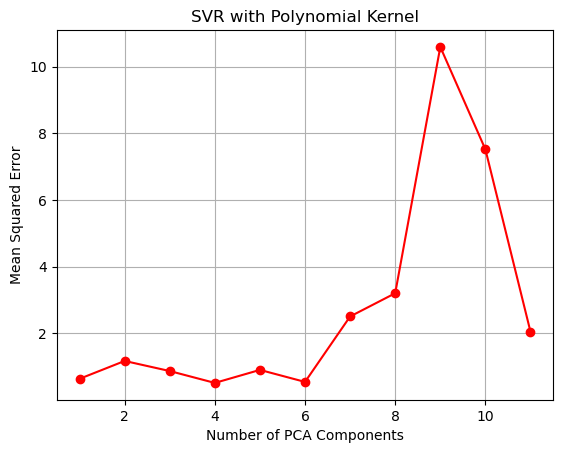

PCA Components: 1
MSE: 3232810.739492441
------------------------------
PCA Components: 2
MSE: 1213555.277932447
------------------------------
PCA Components: 3
MSE: 439693.0613206324
------------------------------
PCA Components: 4
MSE: 427971.15751391306
------------------------------
PCA Components: 5
MSE: 263981.0459374834
------------------------------
PCA Components: 6
MSE: 203626.45775979428
------------------------------
PCA Components: 7
MSE: 70483.01266433045
------------------------------
PCA Components: 8
MSE: 38696.23524546962
------------------------------
PCA Components: 9
MSE: 45699.04682265197
------------------------------
PCA Components: 10
MSE: 48454.90591548658
------------------------------
PCA Components: 11
MSE: 42361.73835027619
------------------------------


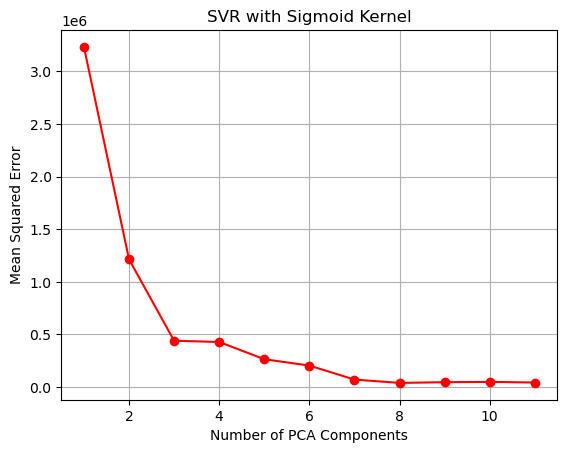

Precomputed Kernel PCA Components: 1
MSE: 0.41970138141993923
------------------------------
Precomputed Kernel PCA Components: 2
MSE: 0.42724131914884167
------------------------------
Precomputed Kernel PCA Components: 3
MSE: 0.42353754439073565
------------------------------
Precomputed Kernel PCA Components: 4
MSE: 0.436122721963501
------------------------------
Precomputed Kernel PCA Components: 5
MSE: 0.4387098322367193
------------------------------
Precomputed Kernel PCA Components: 6
MSE: 0.4349886307627036
------------------------------
Precomputed Kernel PCA Components: 7
MSE: 0.42561624003170767
------------------------------
Precomputed Kernel PCA Components: 8
MSE: 0.4191781896184574
------------------------------
Precomputed Kernel PCA Components: 9
MSE: 0.38463466695219384
------------------------------
Precomputed Kernel PCA Components: 10
MSE: 0.3861429362335269
------------------------------
Precomputed Kernel PCA Components: 11
MSE: 0.3610696460405386
-------------

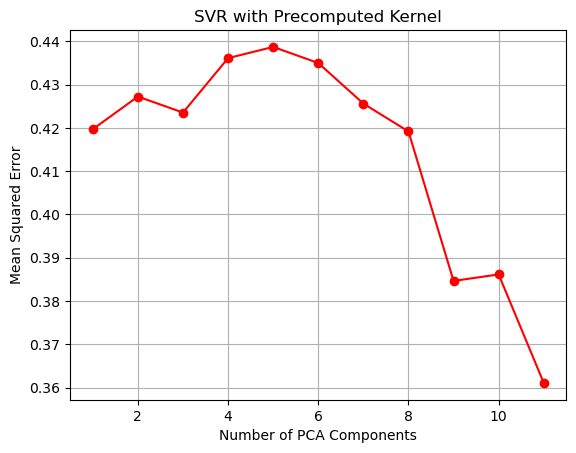

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import warnings

warnings.filterwarnings('ignore')

# Load the dataset
housing_data = pd.read_csv('https://raw.githubusercontent.com/mabdelmo22/Intro_to_ML/main/Housing.csv')
housing_df = pd.DataFrame(housing_data)

# Convert binary columns to numerical
binary_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
housing_df[binary_columns] = housing_df[binary_columns].apply(lambda x: x.map({'yes': 1, 'no': 0}))

# Drop the furnishingstatus column
housing_df = housing_df.drop(columns=['furnishingstatus'])

# Split the data into training and testing sets
train_df, test_df = train_test_split(housing_df, train_size=0.8, test_size=0.2, random_state=0)

# Define the features and target
features = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 
            'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
target = 'price'

X_train = train_df[features].values
y_train = train_df[target].values.reshape(-1, 1)
X_test = test_df[features].values
y_test = test_df[target].values.reshape(-1, 1)

# Standardize the features and target
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

# Determine the maximum number of PCA components
max_components = min(X_train_scaled.shape[1], X_train_scaled.shape[0])

# Function to evaluate SVR with PCA
def evaluate_svr_with_pca(X_train, X_test, y_train, y_test, kernel_type, max_components):
    mse_scores = []
    for k in range(1, max_components + 1):
        pca = PCA(n_components=k)
        X_train_pca = pca.fit_transform(X_train)
        X_test_pca = pca.transform(X_test)

        svr = SVR(kernel=kernel_type, C=100)
        svr.fit(X_train_pca, y_train.ravel())
        y_pred = svr.predict(X_test_pca)
        
        mse = mean_squared_error(y_test, y_pred)
        mse_scores.append(mse)

        print(f"PCA Components: {k}")
        print(f"MSE: {mse}")
        print("-" * 30)
    
    return mse_scores

kernels = ['rbf', 'linear', 'poly', 'sigmoid']
kernel_titles = ['RBF Kernel', 'Linear Kernel', 'Polynomial Kernel', 'Sigmoid Kernel']

for kernel, title in zip(kernels, kernel_titles):
    mse_scores = evaluate_svr_with_pca(X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled, kernel, max_components)

    plt.figure()
    plt.plot(range(1, len(mse_scores) + 1), mse_scores, marker='o', color='r')
    plt.xlabel('Number of PCA Components')
    plt.ylabel('Mean Squared Error')
    plt.title(f'SVR with {title}')
    plt.grid(True)
    plt.show()

# Evaluate SVR with precomputed kernel
mse_precomputed = []
for k in range(1, max_components + 1):
    pca = PCA(n_components=k)
    X_pca = pca.fit_transform(X_train_scaled)
    
    X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_pca, y_train_scaled, test_size=0.2, random_state=0)
    
    kernel_train = np.dot(X_train_split, X_train_split.T)
    svr_precomputed = SVR(kernel='precomputed').fit(kernel_train, y_train_split.ravel())
    
    kernel_test = np.dot(X_test_split, X_train_split.T)
    y_pred_precomputed = svr_precomputed.predict(kernel_test)
    
    mse = mean_squared_error(y_test_split, y_pred_precomputed)
    mse_precomputed.append(mse)
    
    print(f"Precomputed Kernel PCA Components: {k}")
    print(f"MSE: {mse}")
    print("-" * 30)

plt.figure()
plt.plot(range(1, len(mse_precomputed) + 1), mse_precomputed, marker='o', color='r')
plt.xlabel('Number of PCA Components')
plt.ylabel('Mean Squared Error')
plt.title('SVR with Precomputed Kernel')
plt.grid(True)
plt.show()